## Importing required Libraries

In [1]:
import pandas as pd


## Importing the csv files

In [2]:
df0 = pd.read_csv("datasets/fraudTest.csv")
df1 = pd.read_csv("datasets/fraudTrain.csv")
df = pd.concat([df0,df1],ignore_index=True)

## EDA and Data Preprocessing

In [3]:
df.tail(10)
df0.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [4]:
df = df.drop(["Unnamed: 0", "cc_num", "merchant", "first", "last", "street",
                 "lat", "long", "job", "trans_num", "unix_time", "merch_lat", "merch_long", "city", "state", "zip"], axis=1)



In [5]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])
df['hr_day'] = df['trans_date_trans_time'].dt.hour
def time_of_day(hour):
    if  0 <= hour['hr_day'] <= 7:
        val = "night"
    elif 8 <= hour['hr_day'] <= 15:
        val = "morning"
    else:
        val = "midday"
    return val
    
df['time_of_day'] = df.apply(time_of_day,axis=1)
df['year_birth'] = df["dob"].dt.year
def age(age):
    if  2024 - age['year_birth'] <= 29 :
        val = "Young"
    elif 30 <= 2024 - age['year_birth'] <=59 :
        val = "Middle-Aged"
    else:
        val = "Old"
    return val
df['age'] = df.apply(age,axis=1)

In [6]:
df = df.drop(['trans_date_trans_time','dob','hr_day','year_birth'],axis=1)

## Visualizing the Dataset


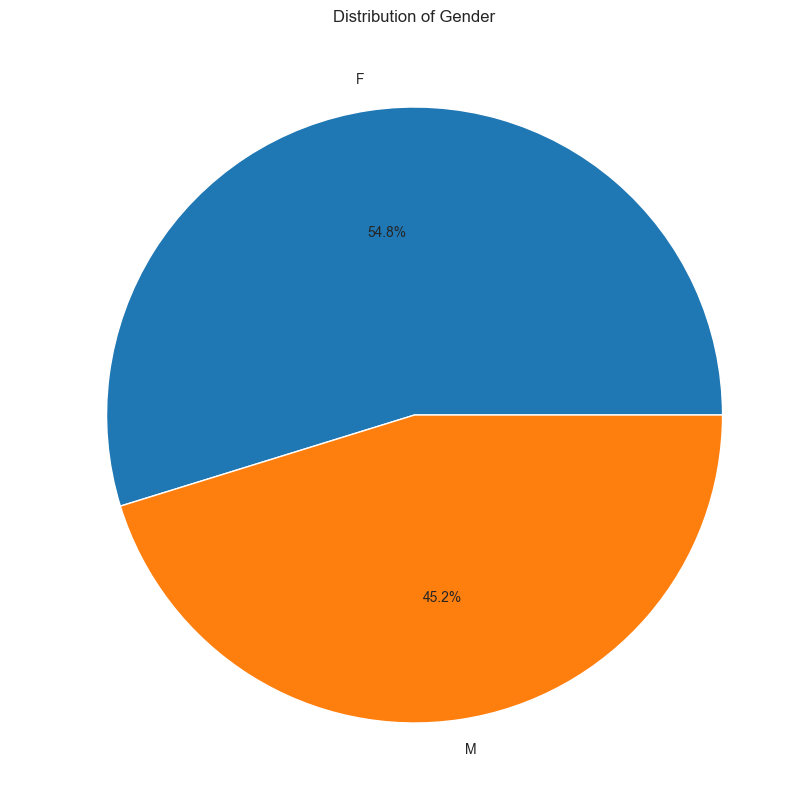

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
df['gender'].value_counts().plot(kind="pie",autopct='%1.1f%%')
plt.title("Distribution of Gender")
plt.ylabel(" ")
plt.show()

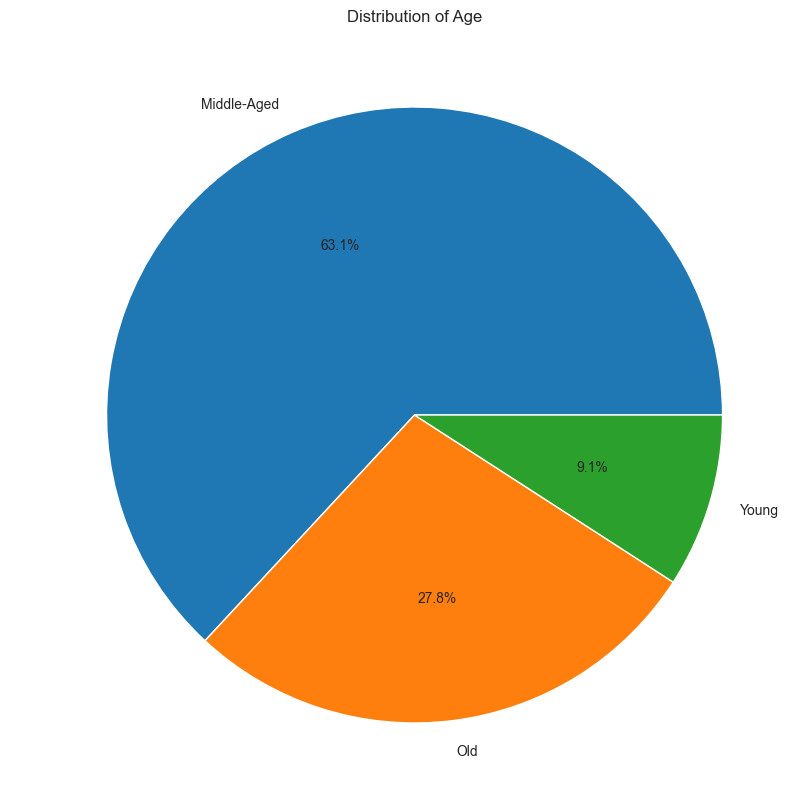

In [8]:
plt.figure(figsize=(10,10))
df['age'].value_counts().plot(kind="pie",autopct='%1.1f%%')
plt.title("Distribution of Age")
plt.ylabel(" ")
plt.show()

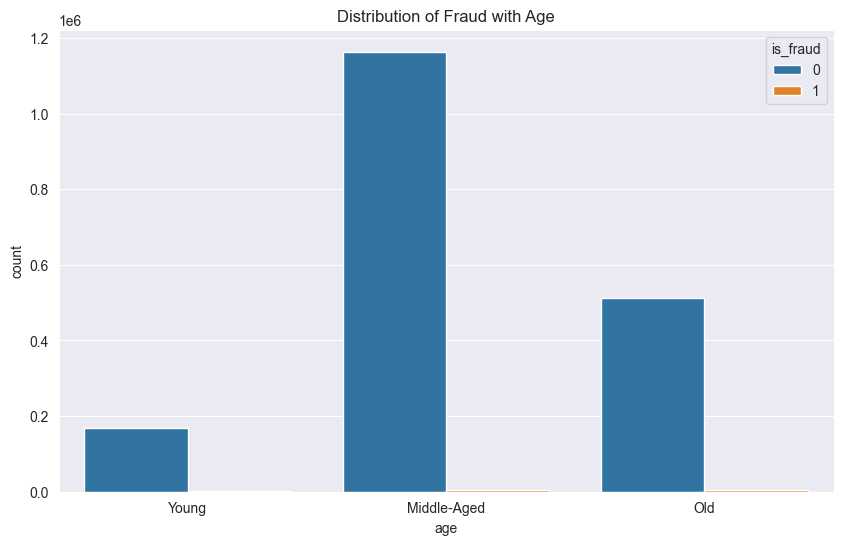

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='age',hue='is_fraud',order=['Young','Middle-Aged','Old'])
plt.title("Distribution of Fraud with Age")
plt.show()

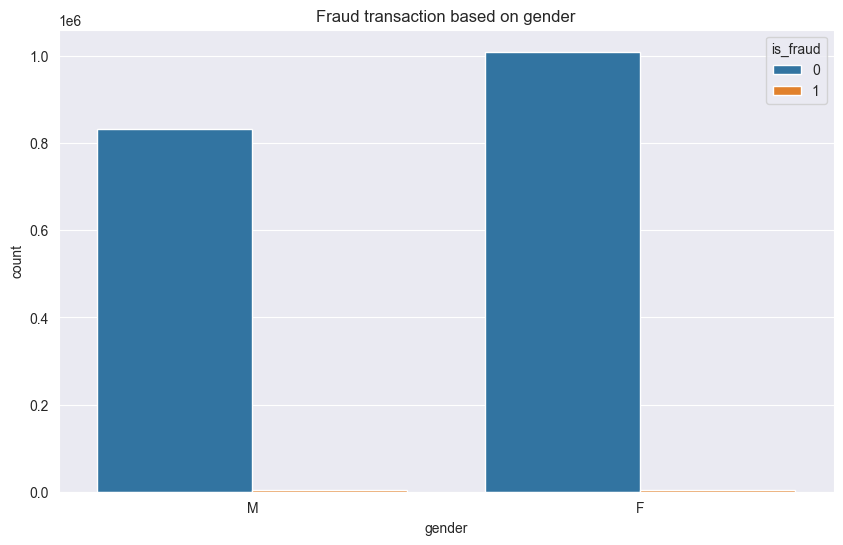

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='gender',hue='is_fraud')
plt.title("Fraud transaction based on gender")
plt.show()

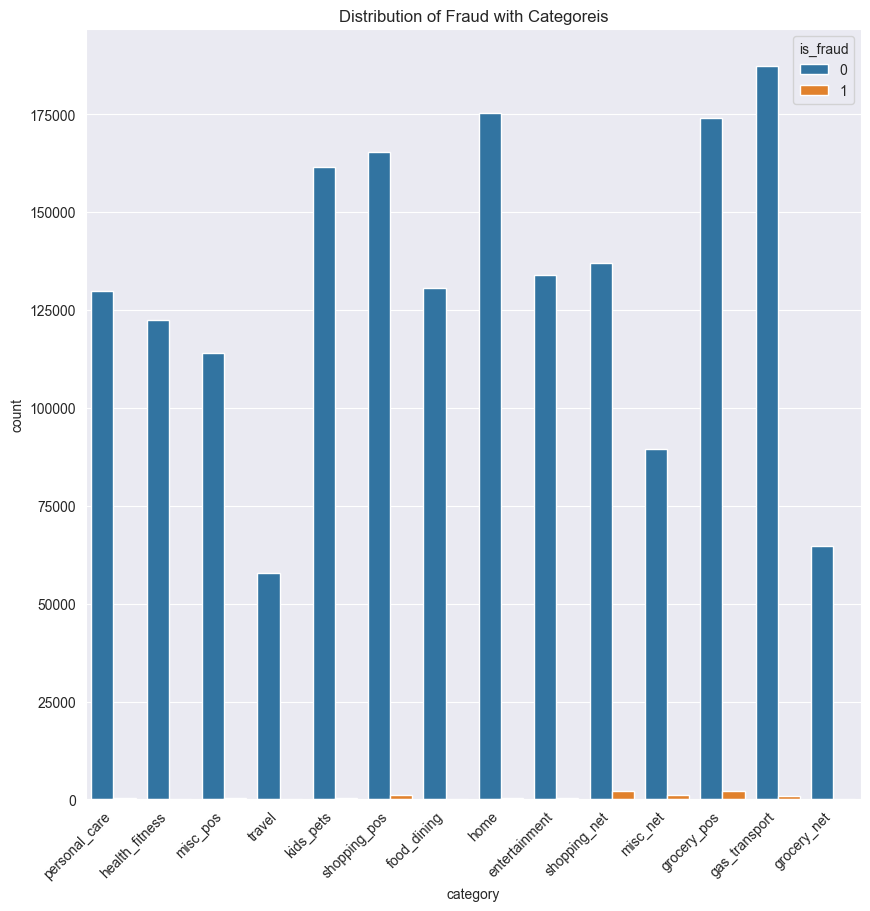

In [11]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='category',hue='is_fraud')
plt.title("Distribution of Fraud with Categoreis")
plt.xticks(rotation=45, ha='right')
plt.show()

## Encoding the categorical variables so that it can be used in the Random Forest Classifier

In [12]:
df = pd.get_dummies(df)
df


,amt,city_pop,is_fraud,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,...,category_shopping_pos,category_travel,gender_F,gender_M,time_of_day_midday,time_of_day_morning,time_of_day_night,age_Middle-Aged,age_Old,age_Young
0,2.86,333497,0,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
1,29.84,302,0,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,True,False,False
2,41.28,34496,0,False,False,False,False,False,True,False,...,False,False,True,False,False,True,False,True,False,False
3,60.05,54767,0,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
4,3.19,1126,0,False,False,False,False,False,False,False,...,False,True,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,15.56,258,0,True,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
1852390,51.70,100,0,False,True,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
1852391,105.93,899,0,False,True,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
1852392,74.90,1126,0,False,True,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False


In [13]:
df

,amt,city_pop,is_fraud,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,...,category_shopping_pos,category_travel,gender_F,gender_M,time_of_day_midday,time_of_day_morning,time_of_day_night,age_Middle-Aged,age_Old,age_Young
0,2.86,333497,0,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
1,29.84,302,0,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,True,False,False
2,41.28,34496,0,False,False,False,False,False,True,False,...,False,False,True,False,False,True,False,True,False,False
3,60.05,54767,0,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
4,3.19,1126,0,False,False,False,False,False,False,False,...,False,True,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,15.56,258,0,True,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
1852390,51.70,100,0,False,True,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
1852391,105.93,899,0,False,True,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
1852392,74.90,1126,0,False,True,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False


In [14]:
X = df.drop("is_fraud",axis=1)
y = df['is_fraud']
pd.options.display.max_columns = None

print(X)

            amt  city_pop  category_entertainment  category_food_dining  \
0          2.86    333497                   False                 False   
1         29.84       302                   False                 False   
2         41.28     34496                   False                 False   
3         60.05     54767                   False                 False   
4          3.19      1126                   False                 False   
...         ...       ...                     ...                   ...   
1852389   15.56       258                    True                 False   
1852390   51.70       100                   False                  True   
1852391  105.93       899                   False                  True   
1852392   74.90      1126                   False                  True   
1852393    4.30       218                   False                  True   

         category_gas_transport  category_grocery_net  category_grocery_pos  \
0                   

## Splitting the data into training set and testing set

In [18]:
### Using KFold to split the data into 5 folds


In [14]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
kfold=KFold(5,shuffle = True,random_state=42)
cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kfold.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1
score = cross_val_score(RandomForestClassifier(random_state= 42), X, y, cv= kfold, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

## Training the Random Forest Classifier model

In [12]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
classifier =  RandomForestClassifier(random_state=42)
# We create smote pipeline
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4),classifier)
model = smote_pipeline.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

## Using GridSearchCV to get the best measure of hyper parameter based on recall metric

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {"max_depth": [3,5,None],
              "n_estimators": [3,5,10],
              "max_features": [5,6,7,8]
              }
classifier =  RandomForestClassifier(max_features=3, max_depth=2 ,n_estimators=10, random_state=3, criterion='entropy', n_jobs=1, verbose=1 )
# We create smote pipeline

grid_search = GridSearchCV(classifier,param_grid=param_grid,cv=5,scoring="recall")
grid_search.fit(X_train,y_train)

In [14]:
grid_search.best_score_

In [15]:
grid_search.best_params_

## Using the obtained optimize hyperparameter to train the model 

In [16]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
classifier =  RandomForestClassifier(max_features=8,n_estimators=5,random_state=42)
# We create smote pipeline
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4),classifier)
model = smote_pipeline.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

## Pickling out the model into a binary file for further usage

In [17]:
import pickle
pickle_model = open("RF-Optimized.pickle","wb")
pickle.dump(model,pickle_model)
pickle_model.close()